In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt


In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


2022-01-31 07:45:36.572270: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-31 07:45:36.675981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-31 07:45:36.676946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


# Loading training data using keras inbuilt image generator

## Loading Training data

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.3,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../input/chest-xray-pneumoniacovid19tuberculosis/train',
                                                 target_size = (224, 224),
                                                 batch_size = 50,
                                                 color_mode='rgb',
                                                 class_mode = 'categorical')

Found 6326 images belonging to 4 classes.


## Loading Testing data

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumoniacovid19tuberculosis/test',
                                            target_size = (224, 224),
                                            batch_size = 25,
                                            color_mode='rgb',
                                            class_mode = 'categorical')

Found 771 images belonging to 4 classes.


## Loading Validation data

In [6]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = test_datagen.flow_from_directory('../input/chest-xray-pneumoniacovid19tuberculosis/val',
                                            target_size = (224, 224),
                                            batch_size = 6,
                                            color_mode='rgb',
                                            class_mode = 'categorical')

Found 38 images belonging to 4 classes.


# Loading VGG16 Neural network(imagenet)

In [8]:
from keras.applications.vgg16 import VGG16
vgg16net = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
vgg16net.trainable = False

## adding dense layers for classification 
x = layers.Flatten()(vgg16net.output)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.4)(x)
x = layers.Dense(units=1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.3)(x)
x = layers.Dense(units=516, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(units=256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.1)(x)
op = layers.Dense(units=4, activation='softmax')(x)

detector_vgg16 = keras.Model(inputs=vgg16net.input, outputs=op)


In [ ]:
detector_vgg16.summary()

## Compilation and Training of VGG16

In [9]:
detector_vgg16.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])

#earlystopping and modelCallbacks

es = EarlyStopping(monitor='val_loss', mode='min', patience=7,verbose=1)
mc = ModelCheckpoint(filepath='detector_vgg16_weights.h5', monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=True)

history_vgg16 = detector_vgg16.fit(x=training_set, epochs=60, validation_data=test_set, callbacks=[es,mc])

2022-01-31 07:46:11.698740: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60


2022-01-31 07:46:15.199899: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


127/127 [==============================] - 218s 2s/step - loss: 0.5824 - accuracy: 0.8139 - val_loss: 0.7485 - val_accuracy: 0.6641
Epoch 2/60
127/127 [==============================] - 137s 1s/step - loss: 0.2881 - accuracy: 0.9108 - val_loss: 0.4093 - val_accuracy: 0.8638
Epoch 3/60
127/127 [==============================] - 137s 1s/step - loss: 0.2259 - accuracy: 0.9334 - val_loss: 0.3764 - val_accuracy: 0.8820
Epoch 4/60
127/127 [==============================] - 139s 1s/step - loss: 0.1866 - accuracy: 0.9391 - val_loss: 0.3223 - val_accuracy: 0.9079
Epoch 5/60
127/127 [==============================] - 140s 1s/step - loss: 0.1813 - accuracy: 0.9440 - val_loss: 0.2930 - val_accuracy: 0.9118
Epoch 6/60
127/127 [==============================] - 138s 1s/step - loss: 0.1514 - accuracy: 0.9515 - val_loss: 0.2821 - val_accuracy: 0.9157
Epoch 7/60
127/127 [==============================] - 136s 1s/step - loss: 0.1477 - accuracy: 0.9512 - val_loss: 0.2949 - val_accuracy: 0.9105
Epoch 8/60

# Loading VGG19 Neural Network

In [10]:
from keras.applications.vgg19 import VGG19
vgg19net = VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))
vgg19net.trainable = False

## adding dense layers for classification 
x = layers.Flatten()(vgg19net.output)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.4)(x)
x = layers.Dense(units=1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.3)(x)
x = layers.Dense(units=516, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(units=256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.1)(x)
op = layers.Dense(units=4, activation='softmax')(x)

detector_vgg19 = keras.Model(inputs=vgg19net.input, outputs=op)

80150528/80134624 [==============================] - 0s 0us/step


## Compilation and Training of VGG19

In [11]:
detector_vgg19.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])

#earlystopping and modelCallbacks

es1 = EarlyStopping(monitor='val_loss', mode='min', patience=10,verbose=1)
mc1 = ModelCheckpoint(filepath='detector_vgg19_weights.h5', monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=True)

history_vgg19 = detector_vgg19.fit(x=training_set, epochs=60, validation_data=test_set, callbacks=[es1,mc1])

Epoch 1/60
127/127 [==============================] - 140s 1s/step - loss: 0.5553 - accuracy: 0.8248 - val_loss: 0.7162 - val_accuracy: 0.6693
Epoch 2/60
127/127 [==============================] - 138s 1s/step - loss: 0.3010 - accuracy: 0.9085 - val_loss: 0.4353 - val_accuracy: 0.8379
Epoch 3/60
127/127 [==============================] - 138s 1s/step - loss: 0.2387 - accuracy: 0.9227 - val_loss: 0.3609 - val_accuracy: 0.8755
Epoch 4/60
127/127 [==============================] - 137s 1s/step - loss: 0.1958 - accuracy: 0.9323 - val_loss: 0.3360 - val_accuracy: 0.8923
Epoch 5/60
127/127 [==============================] - 139s 1s/step - loss: 0.1935 - accuracy: 0.9346 - val_loss: 0.3249 - val_accuracy: 0.8923
Epoch 6/60
127/127 [==============================] - 139s 1s/step - loss: 0.1756 - accuracy: 0.9402 - val_loss: 0.2971 - val_accuracy: 0.9066
Epoch 7/60
127/127 [==============================] - 139s 1s/step - loss: 0.1757 - accuracy: 0.9429 - val_loss: 0.3204 - val_accuracy: 0.8949

# Loading Xception Neural Network

In [12]:
from keras.applications.xception import Xception

xceptionet = Xception(include_top=False, weights="imagenet", input_shape=(224,224,3))
xceptionet.trainable = False

## adding dense and regularization layers for classification
x = layers.Flatten()(xceptionet.output)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Dense(units=1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.4)(x)
x = layers.Dense(units=516, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.3)(x)
x = layers.Dense(units=256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.2)(x)
op = layers.Dense(units=4, activation='softmax')(x)

detector_xception = keras.Model(inputs=xceptionet.input, outputs=op)

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
detector_xception.summary()

## Compilation and training of Xception

In [13]:
detector_xception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])

#earlystopping and modelCallbacks

es2 = EarlyStopping(monitor='val_loss', mode='min', patience=12,verbose=1)
mc2 = ModelCheckpoint(filepath='detector_xception_weights.h5', monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=True)

history_xception = detector_xception.fit(x=training_set, epochs=60, validation_data=test_set, callbacks=[es2,mc2])

Epoch 1/60
127/127 [==============================] - 144s 1s/step - loss: 0.5840 - accuracy: 0.8174 - val_loss: 0.3881 - val_accuracy: 0.8625
Epoch 2/60
127/127 [==============================] - 140s 1s/step - loss: 0.3248 - accuracy: 0.9029 - val_loss: 0.3281 - val_accuracy: 0.8833
Epoch 3/60
127/127 [==============================] - 140s 1s/step - loss: 0.2689 - accuracy: 0.9164 - val_loss: 0.3394 - val_accuracy: 0.8807
Epoch 4/60
127/127 [==============================] - 139s 1s/step - loss: 0.2514 - accuracy: 0.9233 - val_loss: 0.3454 - val_accuracy: 0.8690
Epoch 5/60
127/127 [==============================] - 139s 1s/step - loss: 0.2446 - accuracy: 0.9252 - val_loss: 0.3058 - val_accuracy: 0.8833
Epoch 6/60
127/127 [==============================] - 140s 1s/step - loss: 0.2214 - accuracy: 0.9287 - val_loss: 0.2783 - val_accuracy: 0.8949
Epoch 7/60
127/127 [==============================] - 140s 1s/step - loss: 0.2049 - accuracy: 0.9339 - val_loss: 0.2618 - val_accuracy: 0.9027

# Loading Resnet50 

In [14]:
from keras.applications.resnet import ResNet50
resnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))
resnet50.trainable = False

## adding dense and regularization layers for classification
x = layers.Flatten()(resnet50.output)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Dense(units=1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.4)(x)
x = layers.Dense(units=516, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.3)(x)
x = layers.Dense(units=256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(rate=0.2)(x)
op = layers.Dense(units=4, activation='softmax')(x)

detector_resnet50 = keras.Model(inputs=resnet50.input, outputs=op)


94781440/94765736 [==============================] - 0s 0us/step


## compilation and training of ResNet50

In [15]:
detector_resnet50.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])

#earlystopping and modelCallbacks

es3 = EarlyStopping(monitor='val_loss', mode='min', patience=10,verbose=1)
mc3 = ModelCheckpoint(filepath='detector_resnet50_weights.h5', monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=True)

history_resnet50 = detector_resnet50.fit(x=training_set, epochs=60, validation_data=test_set, callbacks=[es3,mc3])

Epoch 1/60
127/127 [==============================] - 142s 1s/step - loss: 0.9983 - accuracy: 0.6876 - val_loss: 1.5302 - val_accuracy: 0.1764
Epoch 2/60
127/127 [==============================] - 139s 1s/step - loss: 0.6847 - accuracy: 0.7947 - val_loss: 0.7590 - val_accuracy: 0.7095
Epoch 3/60
127/127 [==============================] - 137s 1s/step - loss: 0.5597 - accuracy: 0.8215 - val_loss: 0.5458 - val_accuracy: 0.7938
Epoch 4/60
127/127 [==============================] - 136s 1s/step - loss: 0.5120 - accuracy: 0.8318 - val_loss: 0.5715 - val_accuracy: 0.7925
Epoch 5/60
127/127 [==============================] - 136s 1s/step - loss: 0.4589 - accuracy: 0.8552 - val_loss: 0.5136 - val_accuracy: 0.8184
Epoch 6/60
127/127 [==============================] - 137s 1s/step - loss: 0.4473 - accuracy: 0.8622 - val_loss: 0.4626 - val_accuracy: 0.8405
Epoch 7/60
127/127 [==============================] - 137s 1s/step - loss: 0.4242 - accuracy: 0.8576 - val_loss: 0.4859 - val_accuracy: 0.8340

# Various models (for deployment purpose, use beneath functions)

In [16]:
def load_vgg16(weights):
    from keras.applications.vgg16 import VGG16
    vgg16net = VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
    vgg16net.trainable = False

    ## adding dense layers for classification 
    x = layers.Flatten()(vgg16net.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Dense(units=1024, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Dense(units=516, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    x = layers.Dense(units=256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.1)(x)
    op = layers.Dense(units=4, activation='softmax')(x)

    detector = keras.Model(inputs=vgg16net.input, outputs=op)
    detector.load_weights(weights)
    return detector

def load_vgg19(weights):
    from keras.applications.vgg19 import VGG19
    vgg19net = VGG19(weights='imagenet', include_top=False,input_shape=(224,224,3))
    vgg19net.trainable = False
    ## adding dense layers for classification 
    x = layers.Flatten()(vgg19net.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Dense(units=1024, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Dense(units=516, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    x = layers.Dense(units=256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.1)(x)
    op = layers.Dense(units=4, activation='softmax')(x)

    detector_vgg19 = keras.Model(inputs=vgg19net.input, outputs=op)
    detector_vgg19.load_weights(weights)
    return detector_vgg19

def load_xception(weights):
    from keras.applications.xception import Xception

    xceptionet = Xception(include_top=False, weights="imagenet", input_shape=(224,224,3))
    xceptionet.trainable = False

    ## adding dense and regularization layers for classification
    x = layers.Flatten()(xceptionet.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(units=1024, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Dense(units=516, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Dense(units=256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    op = layers.Dense(units=4, activation='softmax')(x)

    detector_x = keras.Model(inputs=xceptionet.input, outputs=op)
    detector_x.load_weights(weights)
    return detector_x
    
    
def load_resnet50(weights):
    from keras.applications.resnet import ResNet50
    resnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))
    resnet50.trainable = False

    ## adding dense and regularization layers for classification
    x = layers.Flatten()(resnet50.output)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.5)(x)
    x = layers.Dense(units=1024, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.4)(x)
    x = layers.Dense(units=516, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.3)(x)
    x = layers.Dense(units=256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.2)(x)
    op = layers.Dense(units=4, activation='softmax')(x)

    model = keras.Model(inputs=resnet50.input, outputs=op)
    model.load_weights(weights)
    return model

    
    

# Performance evaluation

In [27]:
# load trained vgg16 net

def evaluate_model(weights_path, model_name, train_history):
    if(model_name=='vgg16'):
        saved_model = load_vgg16(weights_path)
        saved_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])
        
    if(model_name=='vgg19'):
        saved_model = load_vgg19(weights_path)
        saved_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    if(model_name=='xception'):
        saved_model = load_xception(weights_path)
        saved_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    if(model_name=='resnet'):
        saved_model = load_resnet50(weights_path)
        saved_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics = ['accuracy'])
        
        
    #_, train_acc = saved_model.evaluate(training_set, verbose=0)
    _, test_acc = saved_model.evaluate(test_set, verbose=0)
    print(f'Test accuracy of {model_name}: %.3f' %(test_acc))

    # plot training history
    fig = plt.figure(figsize=(12,4))
    rows = 1
    col = 2
    
    fig.add_subplot(rows, col, 1)
    
    plt.plot(train_history.history['loss'], label='train_loss')
    plt.plot(train_history.history['val_loss'], label='test_loss')
    plt.legend()
    plt.title(f"{model_name} loss vs epochs")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    
    
    fig.add_subplot(rows, col, 2)
    
    plt.plot(train_history.history['accuracy'], label='train_accuracy')
    plt.plot(train_history.history['val_accuracy'], label='test_accuracy')
    plt.legend()
    plt.title(f"{model_name} accuracy vs epochs")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    
    plt.show()



Test accuracy of vgg16: 0.920


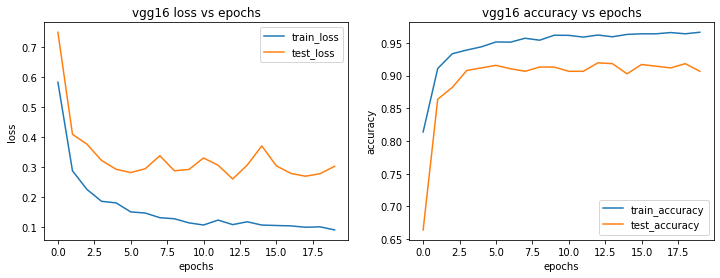

Test accuracy of vgg19: 0.921


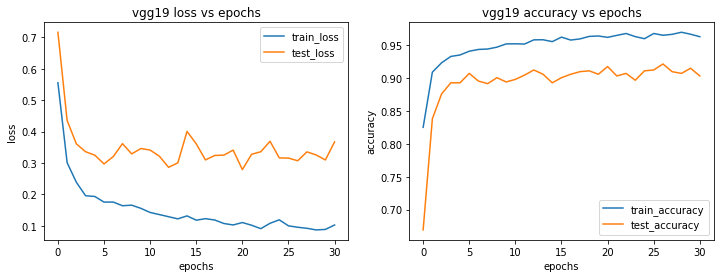

Test accuracy of xception: 0.922


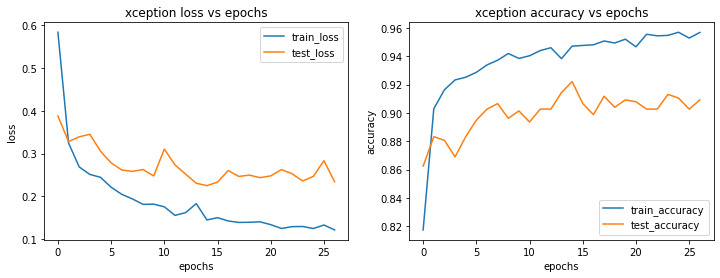

Test accuracy of resnet: 0.886


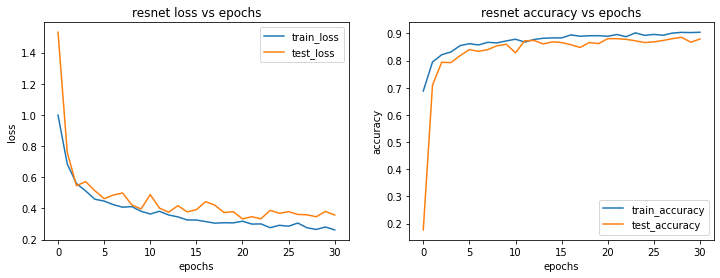

In [28]:
evaluate_model('./detector_vgg16_weights.h5', model_name='vgg16', train_history=history_vgg16)
evaluate_model('./detector_vgg19_weights.h5', model_name='vgg19', train_history=history_vgg19)
evaluate_model('./detector_xception_weights.h5', model_name='xception', train_history=history_xception)
evaluate_model('./detector_resnet50_weights.h5', model_name='resnet', train_history=history_resnet50)
